In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fonctions vectorisées

## 1. Tracés de courbes

Toutes les fonctions de numpy sont VECTORISÉES

In [6]:
def f(t) :
    return np.sinc(t)-0.3*np.sinc(3*t)
f(np.arange(-0.5,0.5001,0.2))

array([0.70028175, 0.82560597, 0.72611354, 0.72611354, 0.82560597,
       0.70028175])

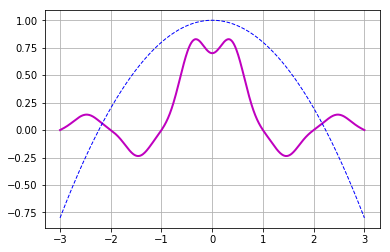

In [11]:
X = np.linspace(-3,3,500)
plt.plot(X,f(X),"-m",linewidth=2)
plt.plot(X,1-0.2*X**2,"--b",linewidth=1)
plt.grid()

Une intégrale $\displaystyle\int_{-1}^{1}f(t)\;dt$

In [14]:
from scipy.integrate import quad
np.info(quad)

 quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08,
      limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
      limlst=50)

Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate.  If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCallable`.
    In the call forms with ``xx``,  ``n`` is the length of the ``xx``
    array w

In [15]:
integ,err = quad(f,-1,1)
integ

1.072361096948513

## Fonction non vectorisée (à cause du if)

In [35]:
def b(t) :
    if t**2 < 5.0 : return 1-0.2*t**2
    else : return 0

In [36]:
b(np.arange(-0.5,0.500,0.2))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Fonction vectorisée (sans if)

In [37]:
T = np.arange(-6,6.01,2.5) ; T

array([-6. , -3.5, -1. ,  1.5,  4. ])

In [38]:
T**2 < 5.0

array([False, False,  True,  True, False])

In [29]:
(T**2 < 5.0)*(1-0.2*T**2)

array([0.   , 0.982, 0.998, 0.998, 0.982, 0.   ])

In [33]:
def g_vec(t) : return (t**2 < 5.0)*(1-0.2*t**2)

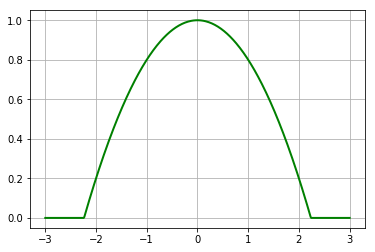

In [34]:
X = np.linspace(-3,3,500)
plt.plot(X,g_vec(X),"-g",linewidth=2)
plt.grid()